In [5]:
import sys
import os
sys.path.insert(1, 'c:\\Users\\Vishal\\OneDrive - Texas Tech University\\lab-projects\\PeakSmoother\\PeakSmoother\\scripts')
import GPR
import matplotlib.pyplot as plt
import pandas as pd

import scienceplots
#plt.style.use('science')
plt.style.use(['science','no-latex'])

In [6]:
data = pd.read_csv("../sample_data/2900.csv")

In [7]:
rt, smoothed_intensity, sigma = GPR.GPR(data['RT'].values, data['Intensity'].values)

c:\Users\Vishal\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Vishal\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


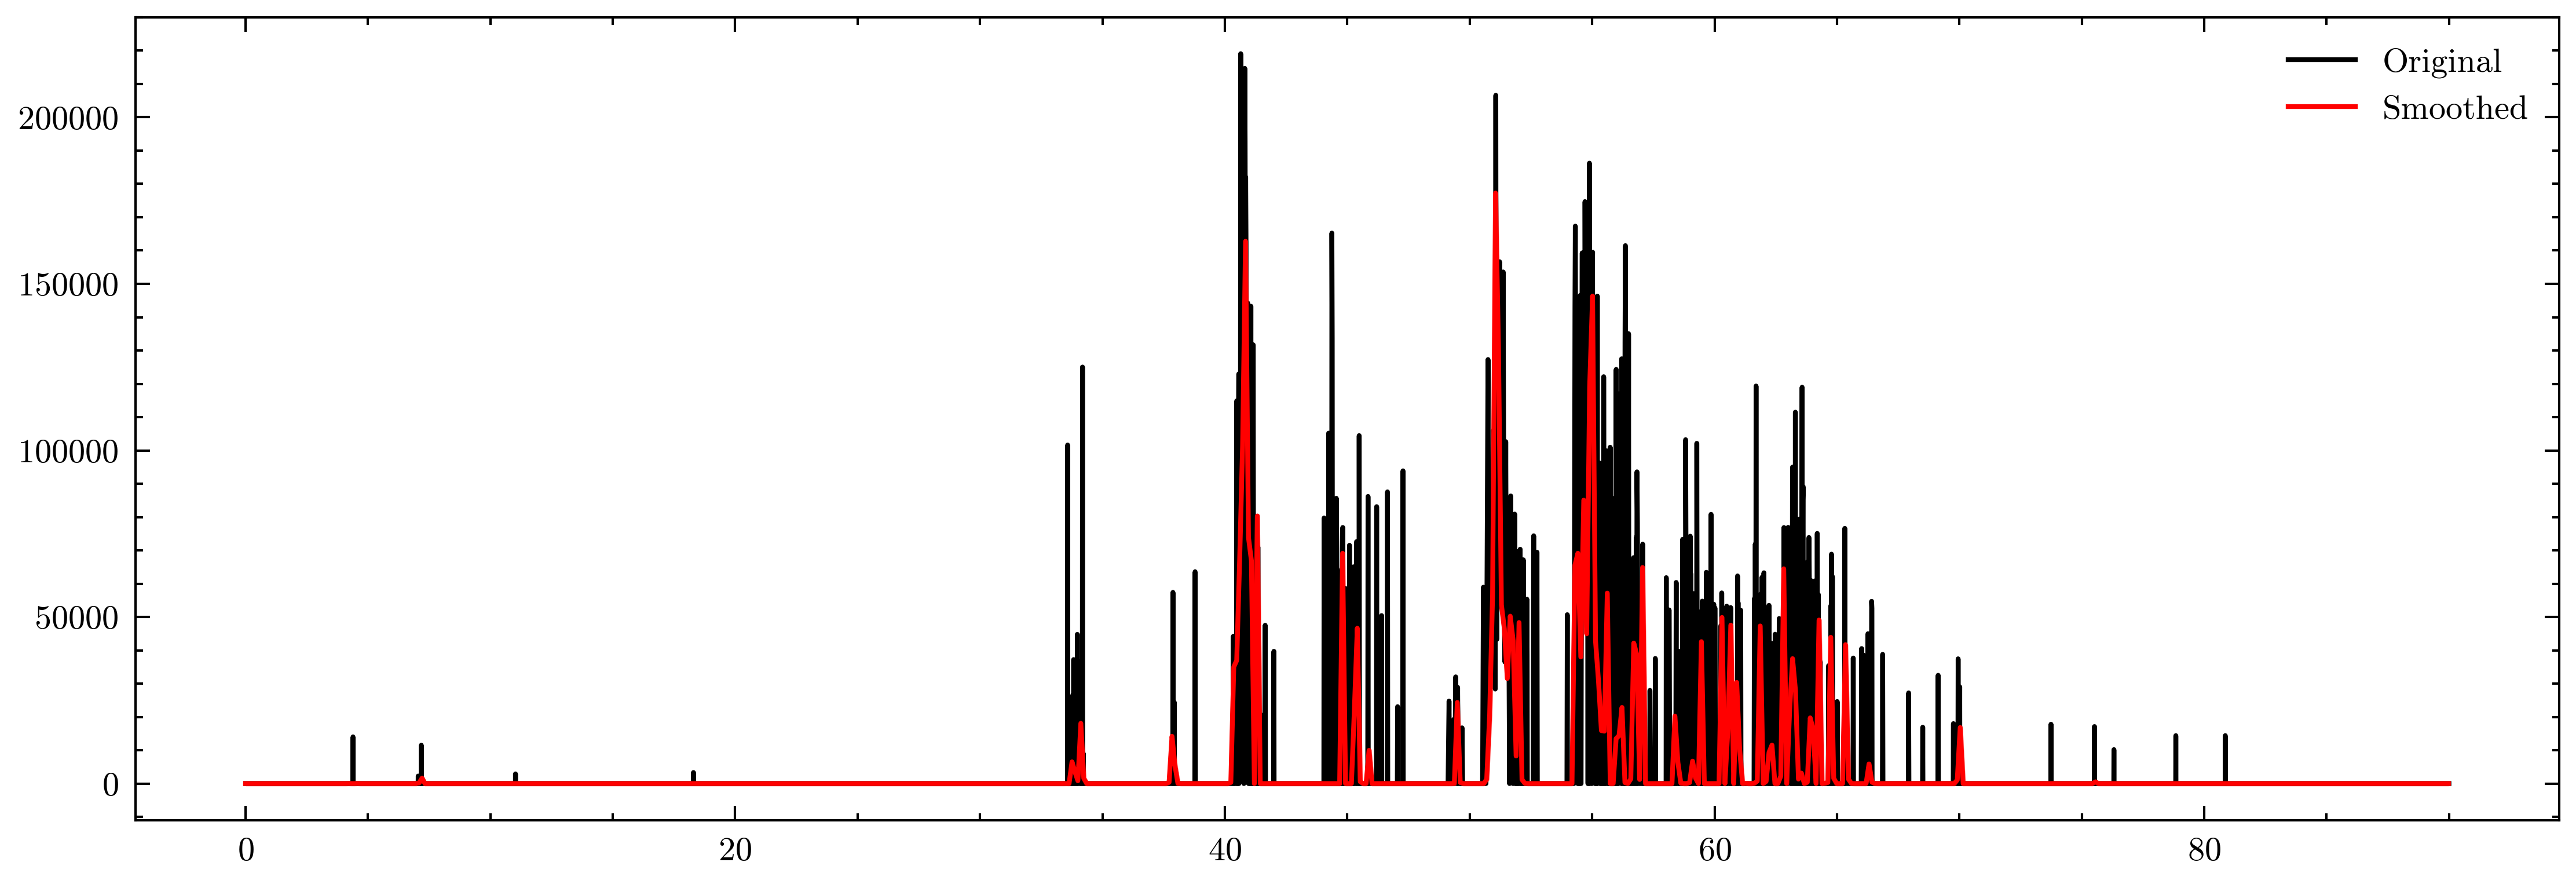

In [36]:
smoothed_data = pd.DataFrame({'RT': rt.ravel(), 'Intensity': smoothed_intensity.ravel()})
smoothed_data['Intensity'] = smoothed_data['Intensity'].clip(lower=0)
plt.figure(figsize=(9, 3))
plt.plot(data['RT'], data['Intensity'], label='Original', color = 'black')
plt.plot(smoothed_data['RT'], smoothed_data['Intensity'], label='Smoothed', color = 'red')
plt.fill_between(smoothed_data['RT'], smoothed_data['Intensity'] - sigma, smoothed_data['Intensity'] + sigma, color='red', alpha=0.3)
plt.legend()

Text(0, 0.5, 'Intensity')

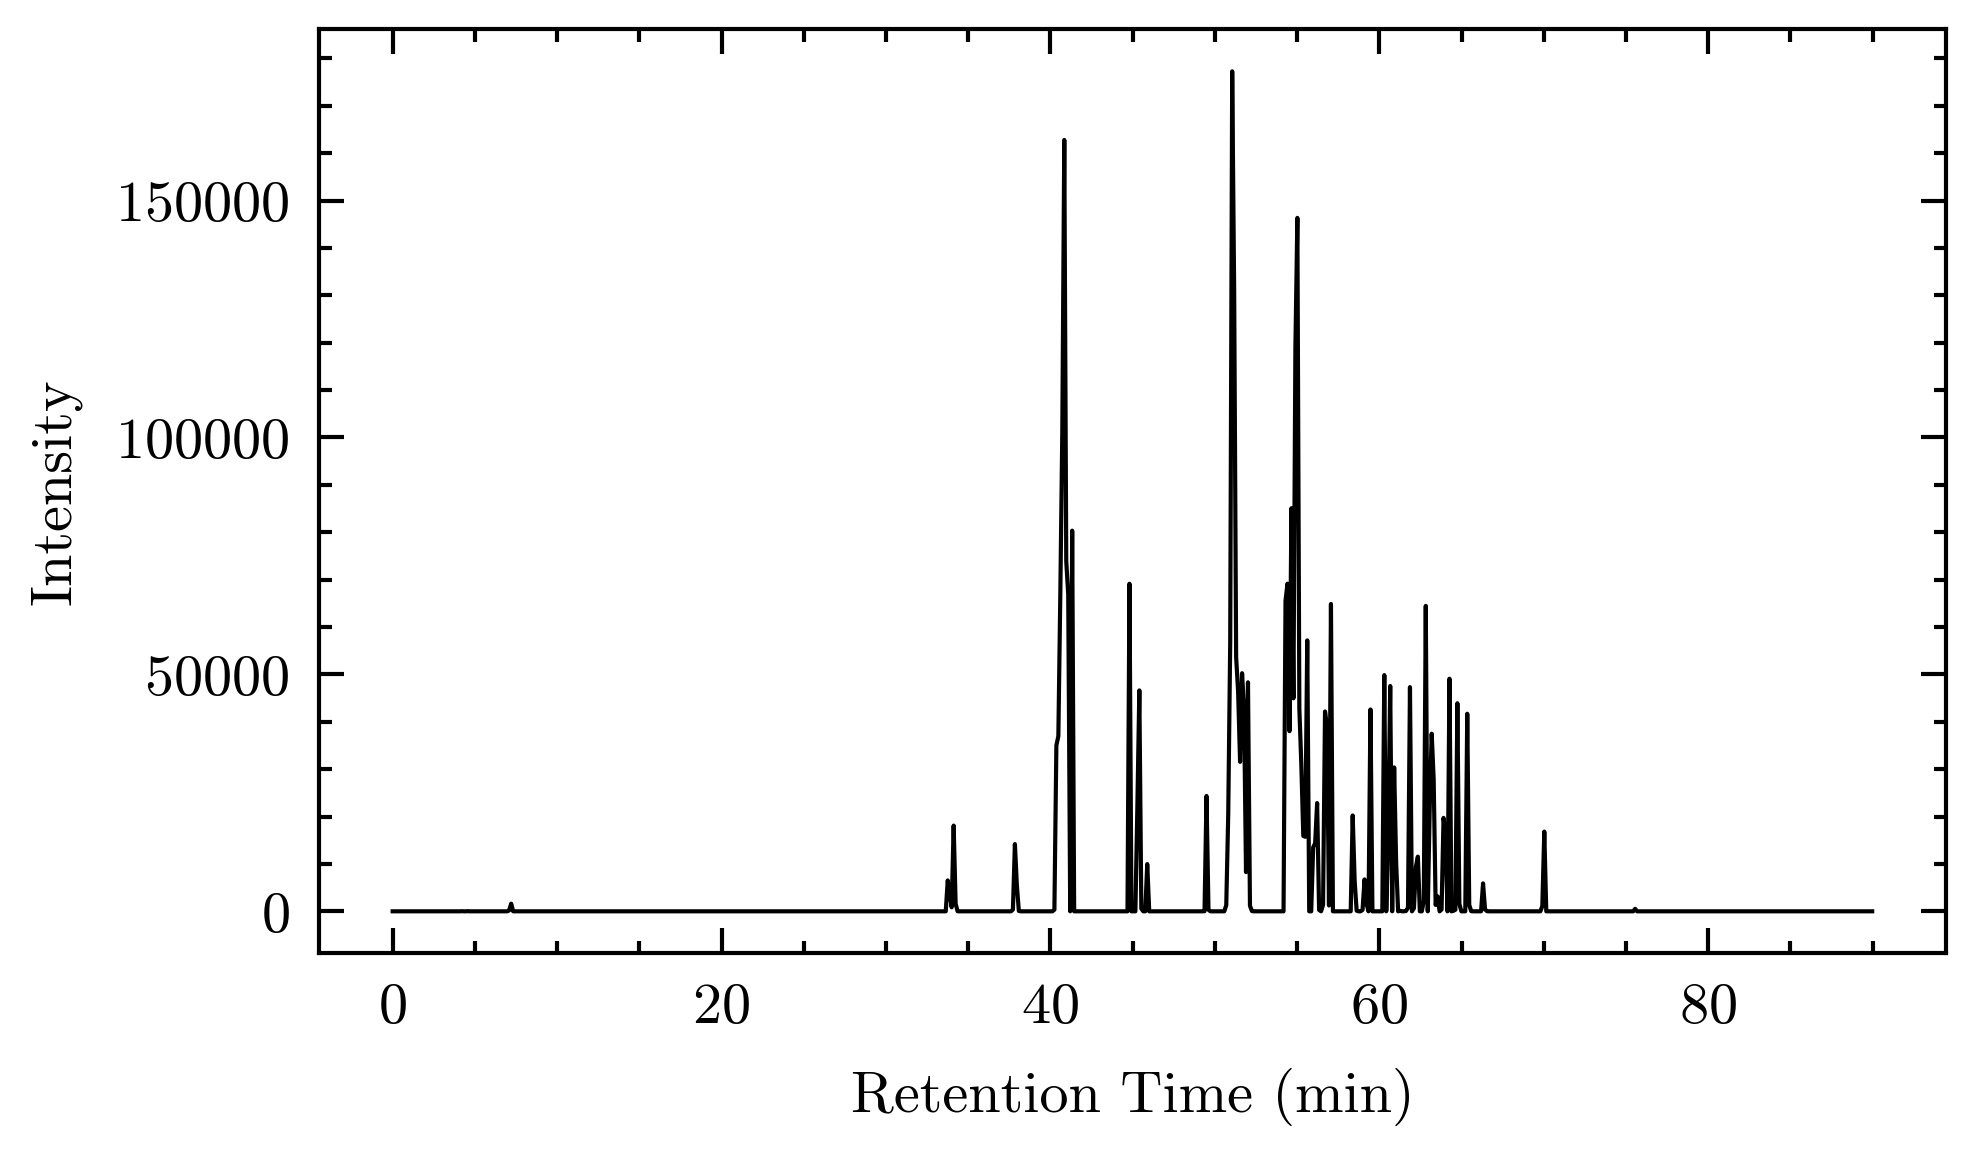

In [38]:
plt.figure(figsize=(3.5, 2))
plt.plot(smoothed_data['RT'], smoothed_data['Intensity'], label='Smoothed', color = "black", linewidth = 0.5)
plt.xlabel('Retention Time (min)')
plt.ylabel('Intensity')

Note: you may need to restart the kernel to use updated packages.
